In [128]:
# Ensemble : Model들을 같이 엮어서 사용하는 방법

In [129]:
library(randomForest)

In [130]:
# Sampling 
set.seed(1234)
library(caret)
samp <- createDataPartition(iris$Species,p=0.7,list=F)  #0.7~ 0.8사이의 값, 데이터 많을때 0.8 
# 학습용 데이터 만들기
data.tr <- iris[samp,]
# 검증용 데이터 만들기
data.test <- iris[-samp,]
# 문제 및 정답 만들기
x <- subset(data.test,select=-Species)
y <- data.test$Species

In [131]:
# 학습시키기
model.rf<- randomForest(Species ~ .,data = data.tr,ntree = 100)
# ntree 기본: 100개, 타입 지정할 필요 없음 

In [132]:
# 검증
pred <- predict(model.rf,x)

In [133]:
# 예측력과 오분류표
mean(pred == y)
table(pred,y)

[1] 0.9333333

            y
pred         setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         12         0
  virginica       0          3        15

---
### 교통사고 예측하기 (회귀식과 randomForest 비교)

In [162]:
seoul <- read.csv("../Data/newSeoul2019.csv")
head(seoul)

년도,월,자치구명,발생건수,사망자수,부상자수
2011,1,종로구,115,2,165
2011,2,종로구,99,0,134
2011,3,종로구,116,0,162
2011,4,종로구,110,1,153
2011,5,종로구,122,0,157
2011,6,종로구,116,3,163


In [163]:
# 종로구 데이터셋 만들기 
JongRo <- subset(seoul,자치구명 == '종로구')
class(JongRo)
str(JongRo)
head(JongRo)
tail(JongRo)

[1] "data.frame"

'data.frame':	108 obs. of  6 variables:
 $ 년도    : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ 월      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 자치구명: Factor w/ 25 levels "강남구","강동구",..: 23 23 23 23 23 23 23 23 23 23 ...
 $ 발생건수: int  115 99 116 110 122 116 103 122 121 135 ...
 $ 사망자수: int  2 0 0 1 0 3 1 1 2 2 ...
 $ 부상자수: int  165 134 162 153 157 163 154 171 166 193 ...


년도,월,자치구명,발생건수,사망자수,부상자수
2011,1,종로구,115,2,165
2011,2,종로구,99,0,134
2011,3,종로구,116,0,162
2011,4,종로구,110,1,153
2011,5,종로구,122,0,157
2011,6,종로구,116,3,163


,년도,월,자치구명,발생건수,사망자수,부상자수
2407,2019,7,종로구,83,0,109
2408,2019,8,종로구,115,0,164
2409,2019,9,종로구,99,0,143
2410,2019,10,종로구,104,0,139
2411,2019,11,종로구,100,0,126
2412,2019,12,종로구,100,0,142


In [164]:
#rownames  정리 
rownames(JongRo) <- c()
tail(JongRo)

,년도,월,자치구명,발생건수,사망자수,부상자수
103,2019,7,종로구,83,0,109
104,2019,8,종로구,115,0,164
105,2019,9,종로구,99,0,143
106,2019,10,종로구,104,0,139
107,2019,11,종로구,100,0,126
108,2019,12,종로구,100,0,142


In [165]:
str(JongRo)

'data.frame':	108 obs. of  6 variables:
 $ 년도    : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ 월      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 자치구명: Factor w/ 25 levels "강남구","강동구",..: 23 23 23 23 23 23 23 23 23 23 ...
 $ 발생건수: int  115 99 116 110 122 116 103 122 121 135 ...
 $ 사망자수: int  2 0 0 1 0 3 1 1 2 2 ...
 $ 부상자수: int  165 134 162 153 157 163 154 171 166 193 ...


In [166]:
#factor 정리 
JongRo$자치구명 <- factor(JongRo$자치구명)
str(JongRo)

'data.frame':	108 obs. of  6 variables:
 $ 년도    : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ 월      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 자치구명: Factor w/ 1 level "종로구": 1 1 1 1 1 1 1 1 1 1 ...
 $ 발생건수: int  115 99 116 110 122 116 103 122 121 135 ...
 $ 사망자수: int  2 0 0 1 0 3 1 1 2 2 ...
 $ 부상자수: int  165 134 162 153 157 163 154 171 166 193 ...


In [139]:
#종료의 발생건수와 부상자수 상관계수 
cor(JongRo$발생건수, JongRo$부상자수)

[1] 0.9208914

In [140]:
# 회귀선 그리기
r1<- lm(JongRo$부상자수~ JongRo$발생건수)
r1


Call:
lm(formula = JongRo$부상자수 ~ JongRo$발생건수)

Coefficients:
    (Intercept)  JongRo$발생건수  
          2.886            1.360  


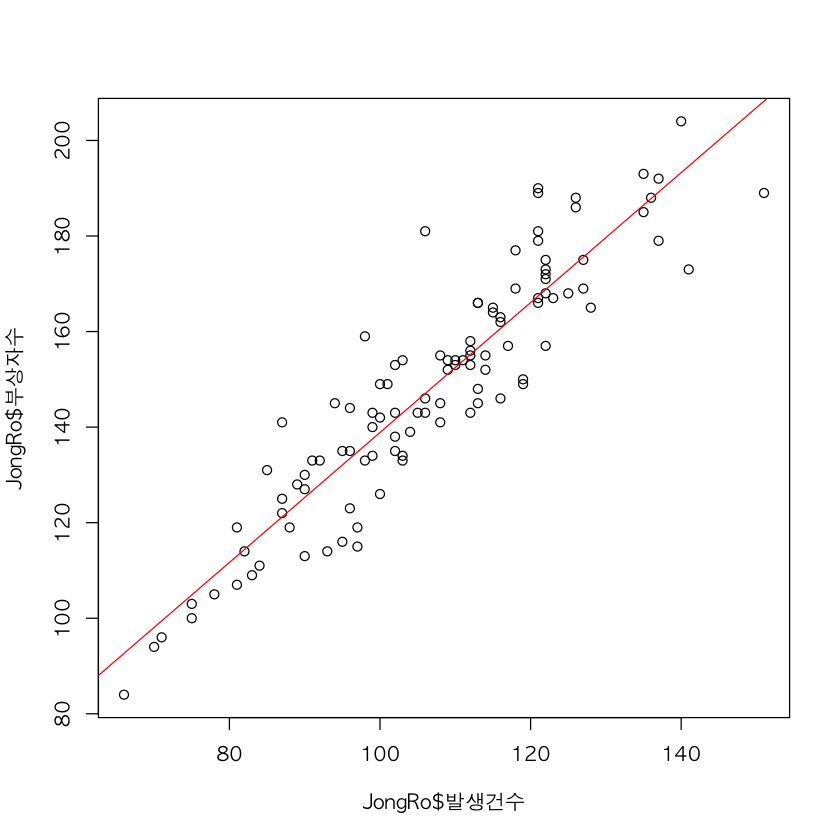

In [223]:
# 종로구의 발생건수와 부상자수의 산포도와 회귀선 그리기
options(warn=-1)
par(family='AppleGothic', bg='white')
plot(JongRo$부상자수~JongRo$발생건수)
abline(r1,col ="red")

In [142]:
options(scipen=100)
summary(r1)
r1


Call:
lm(formula = JongRo$부상자수 ~ JongRo$발생건수)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.637  -5.949  -0.019   5.301  33.961 

Coefficients:
                Estimate Std. Error t value            Pr(>|t|)    
(Intercept)      2.88612    6.05535   0.477               0.635    
JongRo$발생건수  1.35993    0.05591  24.322 <0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.816 on 106 degrees of freedom
Multiple R-squared:  0.848,	Adjusted R-squared:  0.8466 
F-statistic: 591.6 on 1 and 106 DF,  p-value: < 0.00000000000000022



Call:
lm(formula = JongRo$부상자수 ~ JongRo$발생건수)

Coefficients:
    (Intercept)  JongRo$발생건수  
          2.886            1.360  


In [ ]:
# 회귀식 
# 발생건수가 100건이상일 경우  예측 
 p-value: 0.00000000000000022 < 0.05 
Adjusted R-squared:  0.8466 <- 예측력(정확도)
Residual standard error: 9.816  <- 표준오차 

In [193]:
발생건수100 <-  (  1.360 * 100 ) + 2.886
발생건수100
발생건수150 <-  (  1.360 * 150 ) + 2.886
발생건수150

[1] 138.886

[1] 206.886

In [167]:
library(randomForest)

In [200]:
# 데이터 프레임 만들기 
data.frame(발생건수=145)

발생건수
145


In [222]:
# 발생건수가 100건이상일 경우 예측 
# 회귀식
cat("회귀식 :", (  1.360 * 100 ) + 2.886,"\n")
# 랜덤포레스트로 예측 

# 학습시키기 
result=c()
for(i in 1:5) {
model.rf <- randomForest(부상자수~ 발생건수, data = JongRo,ntree=100)
# 검증하기 
pred<- predict(model.rf,data.frame(발생건수=100))
result <- append(result,pred)
}
cat("랜덤포레스트 :",mean(result))

회귀식 : 138.886 
랜덤포레스트 : 139.5929

In [216]:
# 발생건수가 145건이상일 경우 예측 
# 회귀식
cat("회귀식 :", (  1.360 * 145 ) + 2.886,"\n")
# 랜덤포레스트로 예측 

# 학습시키기 
result=c()
for(i in 1:5) {
model.rf <- randomForest(부상자수~ 발생건수, data = JongRo,ntree=100)
# 검증하기 
pred<- predict(model.rf,data.frame(발생건수=145))
result <- append(result,pred)
}
cat("랜덤포레스트 :",mean(result))

회귀식 : 200.086 
랜덤포레스트 : 186.0148

In [224]:
# 발생건수가 85건이상일 경우 예측 
# 회귀식
cat("회귀식 :", (  1.360 * 85) + 2.886,"\n")
# 랜덤포레스트로 예측 

# 학습시키기 
result=c()
for(i in 1:5) {
model.rf <- randomForest(부상자수~ 발생건수, data = JongRo,ntree=100)
# 검증하기 
pred<- predict(model.rf,data.frame(발생건수=85))
result <- append(result,pred)
cat("랜덤포레스트 :",mean(result))
}

회귀식 : 118.486 
랜덤포레스트 : 125.1258랜덤포레스트 : 124.2384랜덤포레스트 : 124.7682랜덤포레스트 : 124.8513랜덤포레스트 : 124.4627

In [ ]:
# 회귀식은 회귀식에 따라 예측 , 랜덤포레스트는 분포에 따라 예측하므로 데이터가 많을때 유의미한 데이터값을 예측가능 